In [20]:
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xesmf as xe
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Interpolate the nectdf file downloaded from Copernicus into ROMS grid

In [2]:
# Read the file with data
with xr.open_dataset('Copernicus.nc') as ds:
        ds = ds      
ds

<xarray.Dataset>
Dimensions:         (lat: 56, lon: 89, time: 762)
Coordinates:
  * lon             (lon) float32 2.975 3.025 3.075 3.125 ... 7.275 7.325 7.375
  * time            (time) datetime64[ns] 2018-12-01T12:00:00 ... 2020-12-31T...
  * lat             (lat) float32 58.47 58.53 58.58 58.62 ... 61.12 61.17 61.22
Data variables:
    analysis_error  (time, lat, lon) float32 ...
    analysed_sst    (time, lat, lon) float32 ...
    mask            (time, lat, lon) float32 ...
Attributes: (12/48)
    Conventions:                                    CF-1.4, ACDD-1.3
    title:                                          Global SST & Sea Ice Anal...
    summary:                                        A merged, multi-sensor L4...
    references:                                     Good S, Fiedler E, Mao C,...
    institution:                                    UKMO
    history:                                        Created from sst.nc; obs_...
    ...                                             ...
    publisher_name:                                 GHRSST Project Office
    publisher_url:                                  http://www.ghrsst.org
    publisher_email:                                ghrsst-po@nceo.ac.uk
    processing_level:                               L4
    cdm_data_type:                                  grid
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

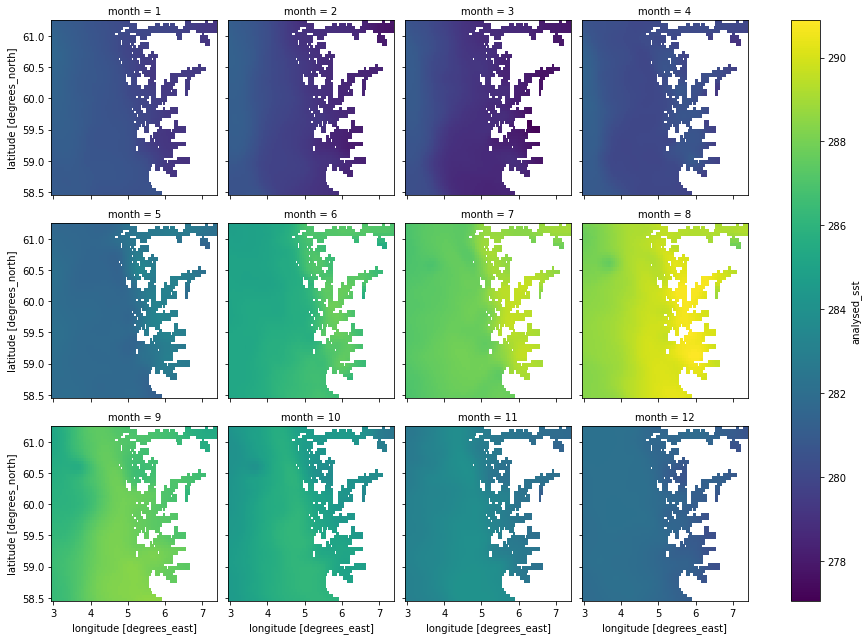

In [3]:
grouped = ds.analysed_sst.groupby('time.month').mean()
grouped.plot(x="lon", y="lat", col="month", col_wrap=4)

In [4]:
ds.analysed_sst['units'] = 'celcius (converted from kelvins)' #.data - 273.15
ds = ds.assign(analysed_sst_celsius= ds.analysed_sst - 273.15)
ds #.attrs #analysed_sst.units

<xarray.Dataset>
Dimensions:               (lat: 56, lon: 89, time: 762)
Coordinates:
  * lon                   (lon) float32 2.975 3.025 3.075 ... 7.275 7.325 7.375
  * time                  (time) datetime64[ns] 2018-12-01T12:00:00 ... 2020-...
  * lat                   (lat) float32 58.47 58.53 58.58 ... 61.12 61.17 61.22
Data variables:
    analysis_error        (time, lat, lon) float32 ...
    analysed_sst          (time, lat, lon) float32 282.3 282.3 ... 280.0 279.9
    mask                  (time, lat, lon) float32 ...
    analysed_sst_celsius  (time, lat, lon) float32 9.19 9.18 9.17 ... 6.86 6.8
Attributes: (12/48)
    Conventions:                                    CF-1.4, ACDD-1.3
    title:                                          Global SST & Sea Ice Anal...
    summary:                                        A merged, multi-sensor L4...
    references:                                     Good S, Fiedler E, Mao C,...
    institution:                                    UKMO
    history:                                        Created from sst.nc; obs_...
    ...                                             ...
    publisher_name:                                 GHRSST Project Office
    publisher_url:                                  http://www.ghrsst.org
    publisher_email:                                ghrsst-po@nceo.ac.uk
    processing_level:                               L4
    cdm_data_type:                                  grid
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

Grid domain longitude from 3.074508711425683 to 7.310298838994383
Grid domain latitude from 58.70190312968447 to 61.15879809421052


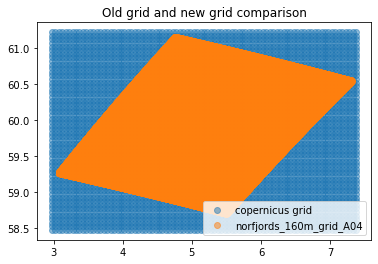

In [14]:
#Plot the old grid against the new grid

ds_grid = xr.open_dataset('/home/lisapro/OneDrive/Documents/Projects/from Windows/norfjords_160m_grid_A04.nc')
print (f"Grid domain longitude from {ds_grid.lon_rho.min().values} to {ds_grid.lon_rho.max().values}")
print (f"Grid domain latitude from {ds_grid.lat_rho.min().values} to {ds_grid.lat_rho.max().values}")
xv, yv = np.meshgrid(ds.isel(time=10).lon.values, ds.isel(time=0).lat.values)

plt.title('Old grid and new grid comparison')
plt.scatter(xv,yv,alpha = 0.5,label = 'copernicus grid')
plt.scatter(ds_grid.lon_rho.values,ds_grid.lat_rho.values,alpha = 0.5,label =  'norfjords_160m_grid_A04')
plt.legend(loc = 'lower right');

<ipython-input-98-659dc863793d>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axs[1] = plt.axes(projection=proj)


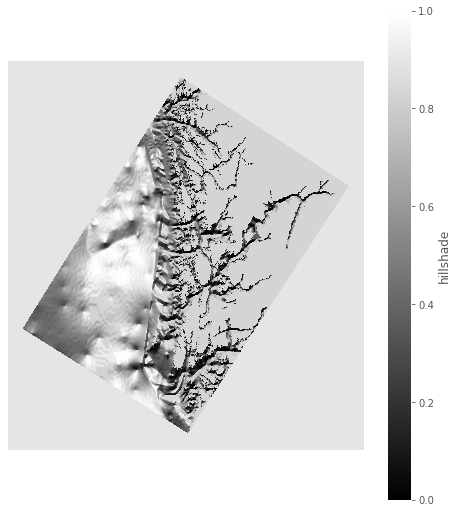

In [98]:
from matplotlib.colors import LightSource
ls = LightSource(azdeg=315, altdeg=45)

z = ls.hillshade(ds_grid.h.values, vert_exag=5)
ds_grid = ds_grid.assign(hillshade = ds_grid.h*0)
ds_grid = ds_grid.assign(hillshade = ds_grid.hillshade + z)
ds_grid


#grid_lon = ds_grid.lon_rho.values
#grid_lat = ds_grid.lat_rho.values      
#mask_rho = ds_grid.mask_rho.values 
#grid_h = ds_grid.h.values
plt.style.use('ggplot')

##fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 9))

##axs.imshow(ls.hillshade(z, vert_exag=0.1), cmap='gray')
##axs.set(xlabel='Illumination Intensity')

proj = ccrs.LambertConformal(central_longitude=17, central_latitude=70)
#fig = plt.figure(figsize=(15, 20))
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 9))
plt.setp(axs.flat, xticks=[], yticks=[])
axs[0] = plt.axes(projection=proj)
axs[1] = plt.axes(projection=proj)

ds_grid.hillshade.plot(ax = axs[0],x='lon_rho', y='lat_rho',cmap='gray',
                                          transform=ccrs.PlateCarree())

#ds_grid.h.plot(ax = axs[1],x='lon_rho', y='lat_rho',
#                                          transform=ccrs.PlateCarree())

#ds_grid.h.plot(x='lon_rho', y='lat_rho',cmap='gray',alpha = 0.5,
#                                          transform=ccrs.PlateCarree(),ax = ax)
#ds_grid.hillshade.plot(x='lon_rho', y='lat_rho',cmap='gray',
#                                          transform=ccrs.PlateCarree())
#coast_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m', #edgecolor='r', 
#                                        facecolor='y',alpha = 0.1)
#ax.add_feature(coast_10m)

In [60]:
ds_out = ds_grid.rename({'lon_rho': 'lon', 'lat_rho': 'lat'})
regridder = xe.Regridder(ds.isel(time = 0), ds_out, 'bilinear')
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_56x89_961x1441.nc 
Reuse pre-computed weights? False 
Input grid shape:           (56, 89) 
Output grid shape:          (961, 1441) 
Periodic in longitude?      False

In [25]:
regridder.weights

<1384801x4984 sparse matrix of type '<class 'numpy.float64'>'
	with 5539204 stored elements in COOrdinate format>

In [15]:
ds_out = regridder(ds.analysed_sst_celsius) #ds.isel(time = 0)
ds_out

/home/lisapro/Downloads/anaconda3/envs/romstools/lib/python3.9/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


<xarray.DataArray 'analysed_sst_celsius' (time: 762, eta_rho: 961, xi_rho: 1441)>
array([[[8.40544321, 8.40520681, 8.4049704 , ...,        nan,
                nan,        nan],
        [8.40593885, 8.40570248, 8.40546608, ...,        nan,
                nan,        nan],
        [8.40643452, 8.40619816, 8.40596178, ...,        nan,
                nan,        nan],
        ...,
        [9.08184947, 9.0822883 , 9.08272716, ..., 9.37022315,
         9.36912352, 9.36801064],
        [9.08081968, 9.08125846, 9.08169729, ..., 9.37275269,
         9.37166436, 9.37056279],
        [9.07979015, 9.08022859, 9.08066738, ..., 9.37529546,
         9.37421844, 9.37312818]],

       [[8.28293071, 8.28293786, 8.28293281, ...,        nan,
                nan,        nan],
        [8.28327046, 8.28328749, 8.28329232, ...,        nan,
                nan,        nan],
        [8.28362241, 8.28364931, 8.28366402, ...,        nan,
                nan,        nan],
...
        [8.17287897, 8.172835  , 8.17279101, ..., 8.34573969,
         8.34583457, 8.34592924],
        [8.17225326, 8.17220931, 8.17216533, ..., 8.35104712,
         8.35114221, 8.35123708],
        [8.17172573, 8.17158364, 8.17153968, ..., 8.35635477,
         8.35645006, 8.35654514]],

       [[7.41835665, 7.41831358, 7.41827059, ...,        nan,
                nan,        nan],
        [7.41712014, 7.41707701, 7.41703395, ...,        nan,
                nan,        nan],
        [7.41588355, 7.41584036, 7.41579723, ...,        nan,
                nan,        nan],
        ...,
        [8.72093267, 8.72115208, 8.72137151, ..., 8.55006473,
         8.54711887, 8.54415981],
        [8.72041777, 8.72063717, 8.72085658, ..., 8.55108329,
         8.54814867, 8.54520085],
        [8.71982162, 8.72012223, 8.72034162, ..., 8.55211503,
         8.54919165, 8.54625508]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-12-01T12:00:00 ... 2020-12-31T12:00:00
    lon      (eta_rho, xi_rho) float64 5.498 5.499 5.5 ... 4.758 4.76 4.761
    lat      (eta_rho, xi_rho) float64 58.7 58.7 58.7 ... 61.16 61.16 61.16
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    regrid_method:  bilinear

In [16]:
ds_out.to_netcdf('regridded_sst_celsius.nc') #analysed_sst_celsius

In [ ]:
grouped_regridded = ds_out.analysed_sst_celsius.groupby('time.month').mean()
grouped_regridded.plot(x="lon", y="lat", col="month", col_wrap=4);

In [12]:
#ds_out.to_netcdf('Copernicus_regridded.nc')
x = ds_out
#x.to_netcdf('test_regridded.nc')

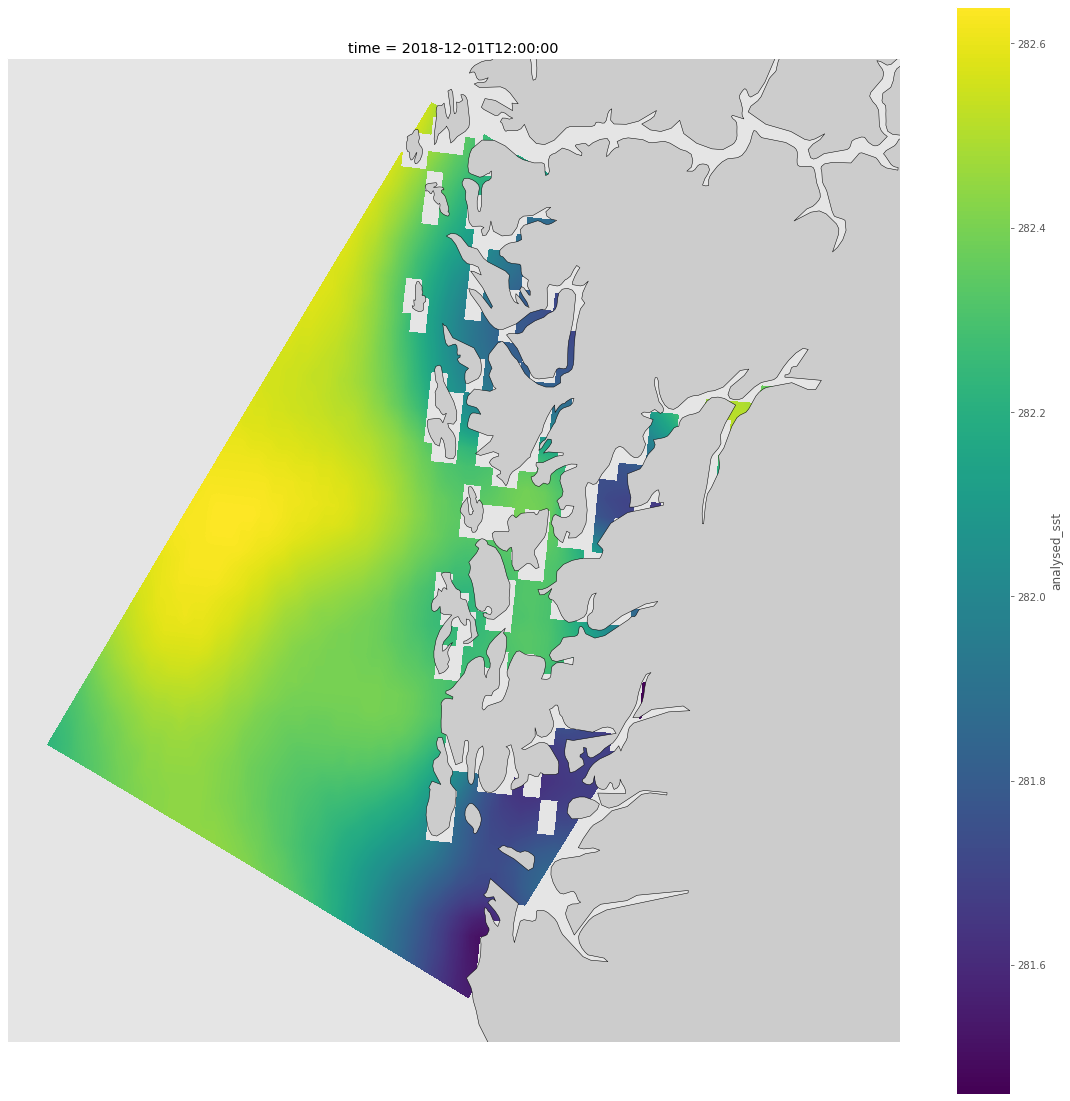

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#df = ds_out.isel(time=0)
ds.analysed_sst,ds_out.analysed_sst
plt.style.use('ggplot')

proj = ccrs.LambertConformal(central_longitude=15, central_latitude=70)
fig = plt.figure(figsize=(17, 17))
ax = plt.axes(projection=proj)

# rename time to ocean time ocean_ s_rho=-1,
ds_out.analysed_sst.isel(time=0).plot(x='lon', y='lat',
                                          transform=ccrs.PlateCarree())

coast_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='k', facecolor='0.8')
ax.add_feature(coast_10m)

In [30]:
set(ds_out.analysed_sst.values)

TypeError: unhashable type: 'numpy.ndarray'

In [16]:
#If the optional keyword zlib is True, the data will be compressed in the netCDF file using gzip compression (default False).
obs_flag = 6 # FOR TEMPERATURE

        SSTi = np.where(SSTi < -0.5, -0.5, SSTi)
        print "Mean SST %s"%(np.ma.mean(SSTi))

        SSTi = SSTi*mask_rho
        
        
igood=np.nonzero(SSTi)
numberOfobs=len(SSTi[igood])

obs_lon=lon_rho[igood]
obs_lat=lat_rho[igood]
obs_value=SSTi[igood]
obs_Xgrid=roms_Xgrid[igood]
obs_Ygrid=roms_Ygrid[igood]
Nobs=numberOfobs
#survey_time.append(currentTime+daysSince1948to1978)

myZLIB = False
unos = np.ones(len(obs_value))
obs_type = obs_flag*unos
obs_error = unos   # error eqaul one scale later
obs_Zgrid = 0*unos
obs_depth = 35*unos #If positive has to be the sigma level, if negative depth in meters
obs_variance=np.asarray(np.ones(Nstate))



NameError: name 'SSTi' is not defined

In [ ]:

f1 = Dataset(outputFile, mode='w', format=myformat)
f1.description="This is a obs file for SST"
#f1.history = 'Created ' + time.ctime(time.time())
#f1.source = 'Trond Kristiansen (trond.kristiansen@imr.no)'
#f1.type='NetCDF4 using program createMapNS.py'

#f1.options='Program requires: getCortad.py and writeObsfile.py'

""" Define dimensions """
f1.createDimension('one', 1)
f1.createDimension('state_variable', Nstate)
f1.createDimension('datum', None)

v_spherical = f1.createVariable('spherical', 'c', ('one',),zlib=myZLIB)
v_spherical.long_name = 'grid type logical switch'
v_spherical.option_T  = "spherical"
v_spherical.option_F  = "Cartesian"
v_spherical[:]        = "T"

v_obs_type = f1.createVariable('obs_type', 'i', ('datum',),zlib=myZLIB)
v_obs_type.long_name = 'model state variable associated with observation'
v_obs_type.opt_1 ='free-surface'
v_obs_type.opt_2 ='vertically integrated u-momentum component';
v_obs_type.opt_3 ='vertically integrated v-momentum component';
v_obs_type.opt_4 ='u-momentum component'
v_obs_type.opt_5 ='v-momentum component'
v_obs_type.opt_6 ='potential temperature'
v_obs_type.opt_7 ='salinity'
v_obs_type[:]    = obs_type

v_time = f1.createVariable('obs_time', 'd', ('datum',),zlib=myZLIB)
v_time.long_name = 'Time of observation'
v_time.units     = 'days'
v_time.field     = 'time, scalar, series'
v_time.calendar  = 'standard'
v_time[:]        = obs_time


v_obs_lon = f1.createVariable('obs_lon', 'd', ('datum',),zlib=myZLIB)
v_obs_lon.long_name = 'Longitude of observation'
v_obs_lon.units     = 'degrees_east'
v_obs_lon.min       = -180
v_obs_lon.max       = 180
v_obs_lon[:]        = obs_lon

v_obs_lat = f1.createVariable('obs_lat', 'd', ('datum',),zlib=myZLIB)
v_obs_lat.long_name = 'Latitude of observation'
v_obs_lat.units     = 'degrees_north'
v_obs_lat.min       = -90
v_obs_lat.max       = 90
v_obs_lat[:]        = obs_lat

v_obs_depth = f1.createVariable('obs_depth', 'd', ('datum',),zlib=myZLIB)
v_obs_depth.long_name = 'Depth of observation'
v_obs_depth.units     = 'meter'
v_obs_depth.minus     = 'downwards'
v_obs_depth[:]        = obs_depth

v_obs_error = f1.createVariable('obs_error', 'd', ('datum',),zlib=myZLIB)
v_obs_error.long_name = 'Observation error covariance'
v_obs_error.units     = 'squared state variable units'
v_obs_error[:]        = obs_error

v_obs_val = f1.createVariable('obs_value', 'd', ('datum',),zlib=myZLIB)
v_obs_val.long_name = 'Observation value'
v_obs_val.units     = 'state variable units'
v_obs_val[:]        = obs_value

v_obs_xgrid = f1.createVariable('obs_Xgrid', 'd', ('datum',),zlib=myZLIB)
v_obs_xgrid.long_name = 'x-grid observation location'
v_obs_xgrid.units     = 'nondimensional'
v_obs_xgrid.left      = "INT(obs_Xgrid(datum))"
v_obs_xgrid.right     = "INT(obs_Xgrid(datum))+1"
v_obs_xgrid[:]        = obs_Xgrid

v_obs_ygrid = f1.createVariable('obs_Ygrid', 'd', ('datum',),zlib=myZLIB)
v_obs_ygrid.long_name = 'y-grid observation location'
v_obs_ygrid.units     = 'nondimensional'
v_obs_ygrid.top       = "INT(obs_Ygrid(datum))+1"
v_obs_ygrid.bottom    = "INT(obs_Ygrid(datum))"
v_obs_ygrid[:]        = obs_Ygrid

v_obs_zgrid = f1.createVariable('obs_Zgrid', 'd', ('datum',),zlib=myZLIB)
v_obs_zgrid.long_name = 'z-grid observation location'
v_obs_zgrid.units     = 'nondimensional'
v_obs_zgrid.up        = "INT(obs_Zgrid(datum))+1"
v_obs_zgrid.down      = "INT(obs_Zgrid(datum))"
v_obs_zgrid[:]        = obs_Zgrid

f1.close()